# Thermodynamics

This post discusses how phase equilibrium is established.  In particular, we discuss multi-component saturating systems which spontaneously form droplets at zero temperature. This was specifically motivated by the discussion of the conditions for droplet formation in Bose-Fermi mixtures [1801.00346] and [1804.03278].  Specifically, the following conditions in [1804.03278]:

\begin{gather}
  \mathcal{E} < 0, \qquad \mathcal{P} = 0;  \tag{i}\\
  \mu_b\pdiff{P}{n_f} = \mu_f\pdiff{P}{n_b};  \tag{ii}\\
  \pdiff{\mu_b}{n_b} > 0 , \qquad 
  \pdiff{\mu_f}{n_f} > 0, \qquad
      \pdiff{\mu_b}{n_b}\pdiff{\mu_f}{n_f} > \left(\pdiff{\mu_b}{n_f}\right)^2.  \tag{iii}
\end{gather}

[1801.00346]: https://arxiv.org/abs/1801.00346
[1804.03278]: https://arxiv.org/abs/1804.03278
<!-- TEASER_END -->

In [1]:
import mmf_setup;mmf_setup.nbinit()

<IPython.core.display.Javascript object>

Brief explanation:

We shall explain $\mathcal{E} <0$ later, but it says that the energy density of the droplet should be less than the energy density of the vacuum.  $\mathcal{P} = 0$ states that the droplet should have the same pressure as the vacuum.  (Here we neglect surface tension).  Restricting $\mathcal{P} = 0$ defines a curve in the $n_b$, $n_f$ plane.  Minimizing the energy density along this curve can be accomplished with a Lagrange multiplier to hold $P$ fixed:

$$
  \pdiff{}{n_j}\left(\mathcal{E}(n) - \lambda P\right) = 0, \qquad
  \pdiff{\mathcal{E}(n)}{n_j} \mu_j = \lambda \pdiff{P}{n_j}, \qquad
  \frac{1}{\mu_j}\pdiff{P}{n_j} = \lambda.
$$

The last equation is simply a rearrangement of (ii).  Finally, for the state to be stable, the energy density must be positive-definite:

$$
  [\mat{H}]_{ij} = \frac{\partial\mathcal{E}}{\partial n_i \partial n_j}.
$$

In general, this means all eigenvalues must be positive, which, for 2x2 matrices this is the same as requiring the trace and determinant to be positive.

For now we consider $T=0$.  Let $n_i \in \{n_b, n_f\}$ be the densities of the various species.  The micro-canonical ensemble can be described by the energy density $\mathcal{E}(n) = \mathcal{E}(n_f, n_b)$.  Other thermodynamic variables can be obtained by differentiating, including the chemical potentials $\mu_i$ and applying the Legendre transform to obtain the pressure $P$:

$$
  \mu_i = \pdiff{\mathcal{E}(n)}{n_i}, \qquad
  P(\mu_i) = \sum_i \mu_i n_i[\mu] - \mathcal{E}(n[\mu]).
$$

To go backwards, note:

$$
  \pdiff{P(\mu)}{\mu_j} = n_j[\mu]  + \sum_i \mu_i \pdiff{n_i[\mu]}{\mu_j}
    - \sum_{i}\overbrace{\pdiff{\mathcal{E}}{n_i}}^{\mu_i}\pdiff{n_i[\mu]}{\mu_j}
  = n_j, \qquad
  \mathcal{E}(n) = \sum_i \mu_i[n] n_i - P(\mu[n]).
$$

Typically, one does some sort of calculation of microscopic states, ending up with an energy density $\mathcal{E}(n)$ as a function of the various densities $n$.  This is not the end of the story due the possibility of forming mixed phases.  These occur if the function $\mathcal{E}(n)$ is not convex.  In this case, a mixed phase consisting of a fraction $x$ of a volume being in state $\mathcal{E}(n_1)$ with volume fraction $1-x$ being in state $\mathcal{E}(n_2)$.  The thermodynamic volume would thus have total energy density

$$
  \mathcal{E}\bigl(xn_1 + (1-x)n_2\bigr) = x\mathcal{E}(n_1) + (1-x)\mathcal{E}(n_2). 
$$

This is a form of [Maxwell Construction](https://en.wikipedia.org/wiki/Maxwell_construction).  These phase combinations must also be considered in conjunction with the pure phases, and the minimum energy density phase must be chosen.  This will result in an energy density $\mathcal{E}$ that is the [convex hull](https://en.wikipedia.org/wiki/Convex_hull) of the previous microscopic state, with mixed phases appearing long sections of zero curvature denoting first-order phase transitions.

# Single Component Example

Here we demonstrate this explicitly with a single component.  We use an equation of state mocking up nuclear matter:

$$
  \mathcal{E}(n) = n\left(\epsilon_0 + \frac{K_0}{2}\delta^2 + \frac{Q_0}{3!}\delta^3\right), \qquad
  \delta = \frac{n-n_0}{3n_0},\\
  \epsilon_0 \approx -16\mathrm{MeV}, \qquad
  n_0 \approx 0.16\mathrm{fm}^{-3}, \qquad
  K_0 \approx 230\mathrm{MeV}, \qquad
  Q_0 = 9(18\epsilon_0 + K_0) \approx -522\mathrm{MeV}.
$$

Note: The value of $Q_0$ was simply chosen so that $\mathcal{E}(0) = 0$: more accurate functional forms will have a different values.  The other parameters have physical meaning: the saturation density $n_0$, saturation energy-per-particle $\epsilon_0$ and nuclear incompressibility $K_0$.

From this, we find the thermodynamic relations:

$$
  \mu = \mathcal{E}'(n) = \epsilon_0 + \frac{K_0}{2}\delta^2 + \frac{Q_0}{3!}\delta^4 + \frac{n}{3n_0}\left(K_0\delta + \frac{Q_0}{2}\delta^2\right)\\
  P = \mu n - \mathcal{E}
$$

Populating the interactive namespace from numpy and matplotlib
-522.0


/data/apps/anaconda/envs/work/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in divide


[0, 0.2, -20, 0]

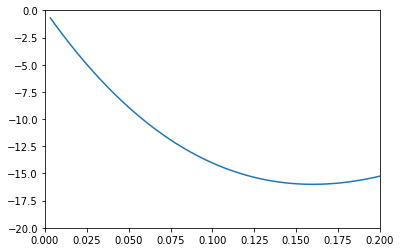

In [62]:
%pylab inline --no-import-all

e0 = -16.0
n0 = 0.16
K0 = 230.0
Q0 = 9*(18*e0 + K0)
print Q0
n = np.linspace(0,2*n0,100)
d = (n-n0)/3./n0
E = n*(e0+K0/2.*d**2 + Q0/6*d**3)
plt.plot(n, E/n)
plt.axis([0, 0.2, -20, 0])